In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)
# Combine the data into a single dataset
merged_df = pd.merge(city_data_df, ride_data_df, on="city")
# Display the data table for preview
merged_df.head()

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


## Bubble Plot of Ride Sharing Data

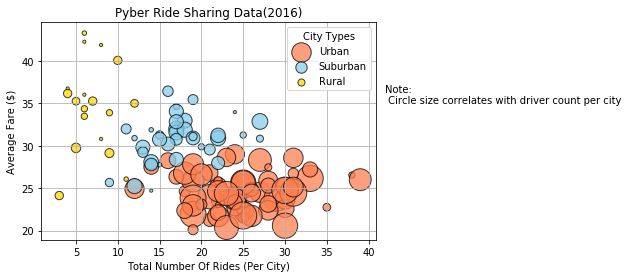

In [43]:
#Creating each city type DF
urban_df = merged_df.loc[(merged_df.type == "Urban")]
rural_df = merged_df.loc[(merged_df.type == "Rural")]
suburban_df = merged_df.loc[(merged_df.type == "Suburban")]

#Creating x-axis for each types
urban_x = urban_df.groupby("city").ride_id.count()
rural_x = rural_df.groupby("city").ride_id.count()
suburban_x = suburban_df.groupby("city").ride_id.count()

#Creating y-axis for each types
urban_y = urban_df.groupby("city").fare.mean()
rural_y = rural_df.groupby("city").fare.mean()
suburban_y = suburban_df.groupby("city").fare.mean()

#Sizing plots for each types
urban_size = urban_df.groupby("city").driver_count.mean()
rural_size = rural_df.groupby("city").driver_count.mean()
suburban_size = suburban_df.groupby("city").driver_count.mean()

#Plot Each Graph
urban = plt.scatter(urban_x, urban_y, facecolors="coral", alpha=0.75, edgecolor="black", linewidth=1.0, s=urban_size*10, label="Urban")
rural = plt.scatter(rural_x, rural_y, facecolors="gold", alpha=0.75, edgecolor="black", linewidth=1.0, s=rural_size*10, label="Rural")
suburban = plt.scatter(suburban_x, suburban_y, facecolors="skyblue", alpha=0.75, edgecolor="black", linewidth=1.0, s=suburban_size*10, label="Suburban")

#Rounding out the graph attributes
plt.title("Pyber Ride Sharing Data(2016)")
plt.xlabel("Total Number Of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.grid()
plt.axis("tight")

#creating a legend
plt.legend(title = "City Types", handles=[urban,suburban,rural])

#creating a text label
plt.text(42,35,"Note: \n Circle size correlates with driver count per city")

#Save
plt.savefig("..Pyber_Data_Scatter.png")

plt.show()

## Total Fares by City Type

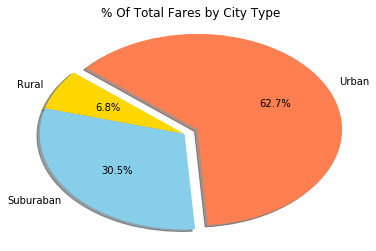

<Figure size 432x288 with 0 Axes>

In [54]:
# Calculate Type Percents
urban_sums = urban_df.fare.sum()
suburban_sums = suburban_df.fare.sum()
rural_sums = rural_df.fare.sum()

# Build Pie Chart
labels = ["Rural", "Suburaban", "Urban"]
colors = ["gold", "skyblue", "coral"]
sizes = [rural_sums, suburban_sums, urban_sums]
explode = (0, 0, 0.1)

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=140)
plt.title("% Of Total Fares by City Type")
plt.axis("tight")
plt.show()
# Save Figure
plt.savefig("Pyber_Total_Fares.png")


## Total Rides by City Type

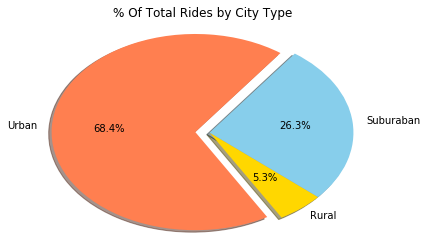

<Figure size 432x288 with 0 Axes>

In [55]:
# Calculate Type Percents
urban_total = urban_df.fare.count()
suburban_total = suburban_df.fare.count()
rural_total = rural_df.fare.count()

# Build Pie Chart
labels = ["Rural", "Suburaban", "Urban"]
colors = ["gold", "skyblue", "coral"]
sizes = [rural_total, suburban_total, urban_total]
explode = (0, 0, 0.1)

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=300)
plt.title("% Of Total Rides by City Type")
plt.axis("tight")
plt.show()
# Save Figure
plt.savefig("Pyber_Total_Rides.png")


## Total Drivers by City Type

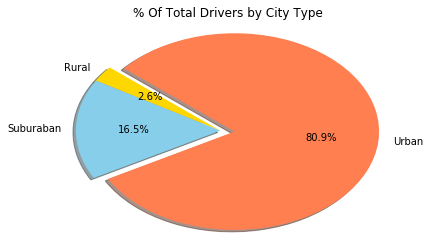

<Figure size 432x288 with 0 Axes>

In [58]:
# Calculate Type Percents
urban_drivers = urban_size.sum()
suburban_drivers = suburban_size.sum()
rural_drivers = rural_size.sum()

# Build Pie Chart
labels = ["Rural", "Suburaban", "Urban"]
colors = ["gold", "skyblue", "coral"]
sizes = [rural_drivers, suburban_drivers, urban_drivers]
explode = (0, 0, 0.1)

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=140)
plt.title("% Of Total Drivers by City Type")
plt.axis("tight")
plt.show()
# Save Figure
plt.savefig("Pyber_Total_Drivers.png")



In [ ]:
#Oberservations
# 1. Most Drivers are in urban cities.
# 2. Less rural drivers than urban drivers but average fare is higher for rural drivers than urban drivers.
# 3. Suburban markets might be the best since it had higher fares than urban drivers and less drivers so less competition.